# The dataset

The dataset consists of images of 4 flowers: common dandelions, sunflowers, roses and corn poppies. The neural network should identify these 4 classes.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Plot Photos
Looking at a few random photos in the directory, you can see that the photos are in color. All images have the same shape and sizes.

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import os

def plot_photos(category):
    # define location of dataset
    folder = '/content/drive/MyDrive/Colab Notebooks/flowers/dataset/train/' + category + "/"
    # plot first few images
    for i in range(9):
        # define subplot
        plt.subplot(330 + 1 + i)
        # define filename
        filename = random.choice(os.listdir(folder))
        # load image pixels
        image = imread(folder + filename)
        # plot raw pixel data
        plt.imshow(image)
    # show the figure
    plt.show()

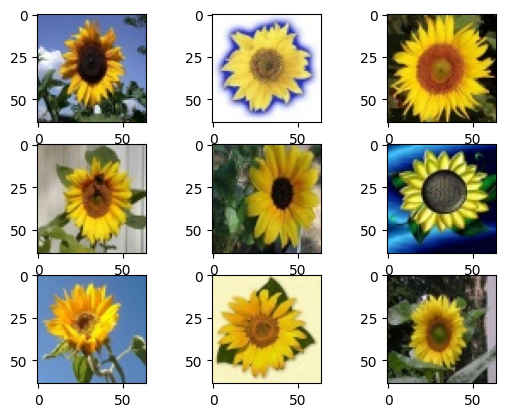

In [4]:
plot_photos('sunflower')

# Import statements

In [5]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
import keras.layers as layers
import warnings

warnings.filterwarnings('ignore')

Enable autocomplete (using tab).

In [6]:
%config Completer.use_jedi = False

# Load data

We are using Keras to retrieve images from the disk with the flow_from_directory method of the ImageDataGenerator class.

Image augmentation is a method of applying different kinds of transformation to original images resulting in multiple transformed copies of the same image. The images are different from each other in certain aspects because of shifting, rotating, flipping techniques. So, we are using the Keras ImageDataGenerator class to augment our images.

All images are reshaped to 64 x 64 square photos. The pixel values are scaled to the range 0-1.

In [7]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/flowers/dataset/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 50,
                                                 class_mode = 'categorical')

Found 323 images belonging to 4 classes.


In [9]:
label_map = (training_set.class_indices)
label_map = dict((v,k) for k,v in label_map.items())

In [10]:
label_map

{0: 'common-dandelion', 1: 'corn-poppy', 2: 'rose', 3: 'sunflower'}

In [11]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/flowers/dataset/test/',
                                            target_size = (64, 64),
                                            batch_size = 50,
                                            class_mode = 'categorical')

Found 115 images belonging to 4 classes.


# Baseline CNN Model

The architecture involves stacking convolutional layers with small 3×3 filters followed by a max pooling layer. Together, these layers form a block, and these blocks can be repeated where the number of filters in each block is increased with the depth of the network such as 32, 64, 128, 256 for the first four blocks of the model. Padding is used on the convolutional layers to ensure the height and width shapes of the output feature maps matches the inputs.
We start with a baseline model with 1 convolutional block.

In [12]:
classifier = Sequential()
#step1-convolution
classifier.add(Convolution2D(32,3,3,input_shape=(64,64,3),activation='relu'))
#step2-maxpooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
#step3-convolution
classifier.add(Convolution2D(32,3,3,activation='relu'))
#step4-flattening
classifier.add(Flatten())
#step5-fullconnection
classifier.add(Dense(128,activation='relu'))
classifier.add(Dense(4,activation='softmax'))

# Compilation Step

In the compilation step we define the:

- the loss function
- the optimizer
- the evaluation metric

In [13]:
classifier.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# Network summary

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 128)               36992     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                        

# Train the network

We can then fit the model using the train iterator (training_set) and use the test iterator (test_set) as a validation dataset during training.

The number of steps for the train and test iterators must be specified. This is the number of batches that will comprise one epoch. This can be specified via the length of each iterator, and will be the total number of images in the train and test directories divided by the batch size (32).

The model will be trained for 25 epochs.

In [15]:
history = classifier.fit_generator(training_set, steps_per_epoch=training_set.n//training_set.batch_size,validation_data=test_set, validation_steps=test_set.n//test_set.batch_size, epochs=25, verbose=1)

Epoch 1/25
6/6 [==============================] - 92s 16s/step - loss: 1.3007 - accuracy: 0.3919 - val_loss: 1.1906 - val_accuracy: 0.6000
Epoch 2/25
6/6 [==============================] - 2s 257ms/step - loss: 1.1591 - accuracy: 0.6000 - val_loss: 1.0679 - val_accuracy: 0.6000
Epoch 3/25
6/6 [==============================] - 1s 223ms/step - loss: 0.9626 - accuracy: 0.6850 - val_loss: 0.8132 - val_accuracy: 0.7400
Epoch 4/25
6/6 [==============================] - 1s 230ms/step - loss: 0.7110 - accuracy: 0.7802 - val_loss: 0.6486 - val_accuracy: 0.7300
Epoch 5/25
6/6 [==============================] - 1s 221ms/step - loss: 0.5605 - accuracy: 0.8022 - val_loss: 0.5454 - val_accuracy: 0.7900
Epoch 6/25
6/6 [==============================] - 1s 245ms/step - loss: 0.4514 - accuracy: 0.8278 - val_loss: 0.5488 - val_accuracy: 0.7800
Epoch 7/25
6/6 [==============================] - 2s 299ms/step - loss: 0.4029 - accuracy: 0.8400 - val_loss: 0.5465 - val_accuracy: 0.7800
Epoch 8/25
6/6 [=====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


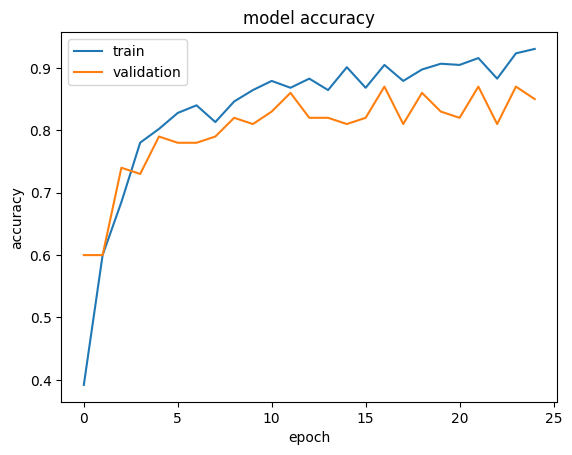

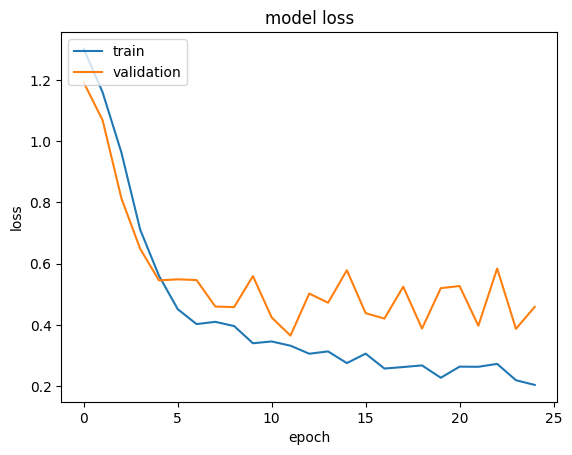

In [16]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Test the network

Use the test set to test how well the network will perform:

In [17]:
# evaluate model
_, acc = classifier.evaluate_generator(test_set, steps=len(test_set), verbose=1)
print('> %.3f' % (acc * 100.0))

3/3 [==============================] - 0s 71ms/step - loss: 0.4716 - accuracy: 0.8435
> 84.348


In [18]:
import keras.layers as layers
import keras

In [19]:
layer_outputs = []
layer_names = []
for layer in classifier.layers:
  if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
    layer_outputs.append(layer.output)
    layer_names.append(layer.name)
activation_model = keras.Model(inputs=classifier.input, outputs=layer_outputs)

1/1 [==============================] - 0s 21ms/step
[[1.2158743e-08 9.6527272e-01 3.4704112e-02 2.3160046e-05]]
corn-poppy


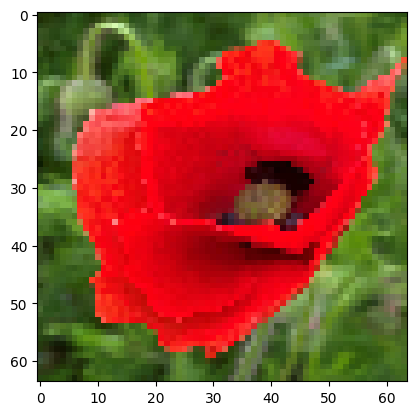

In [29]:
from keras.utils import load_img, img_to_array
predict = load_img('/content/drive/MyDrive/Colab Notebooks/flowers/dataset/poppy.jpg', target_size = (64, 64))
predict_modified = img_to_array(predict)
predict_modified = predict_modified / 255
predict_modified = np.expand_dims(predict_modified, axis = 0)
result = classifier.predict(predict_modified)
activations = activation_model.predict(predict_modified)
plt.imshow(predict)
print(result)
print(label_map[np.argmax(result[0])])

In [30]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 21, 21, 32)


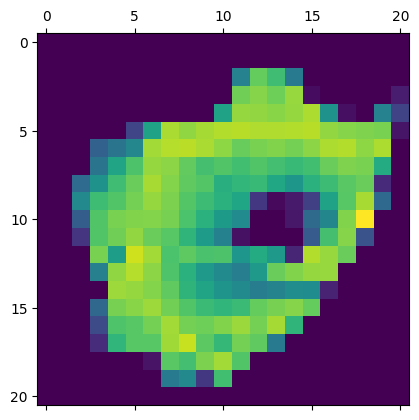

In [31]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap="viridis")

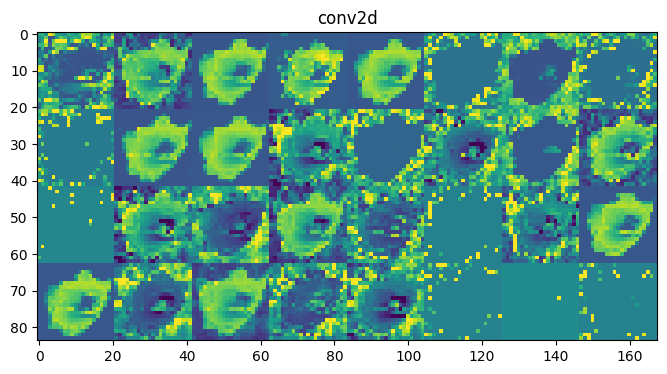

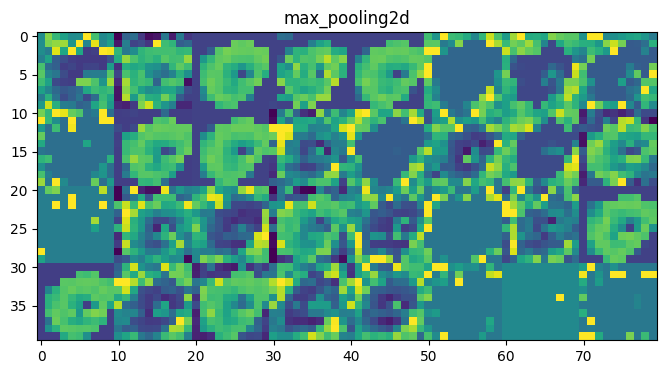

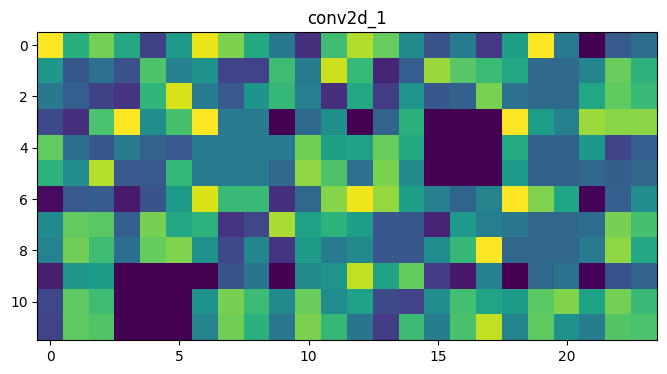

In [32]:
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot

images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')